In [2]:
import numpy as np
from metrics import MEE, Accuracy
from validation import kfold_crossval
from losses import *
from network import Network
from utils import *
from activations import *
from regularizers import *

In [3]:
names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'target']
df = pd.read_csv('../other data/tic+tac+toe+endgame/tic-tac-toe.data', skipinitialspace=True, names=names)
X = pd.get_dummies(
    data=df,
    columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']).drop(['target'],axis=1).values.astype(int)
y = df['target'].map({'positive': 1, 'negative': 0}).values

from sklearn.model_selection import train_test_split

k = int(len(X)/4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k, stratify=y)
X_train.shape = (len(X_train), 27, 1)
y_train.shape = (len(y_train), 1, 1)
X_test.shape = (len(X_test), 27, 1)
y_test.shape = (len(y_test), 1, 1)

In [4]:
seed = 3

In [5]:
np.random.seed(seed)
net = Network(MSE(1), eta=1e-5)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=5,
    starting=Range_random(),
    regularizer=L2(lambda_=1e-6),
    activation=ReLU(),
    momentum=('Standard',1e-2)
)

net.add_layer(
    input_size=5,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    momentum=('Standard',1e-2)
)

Epochs:   9%|▊         | 868/10000 [00:51<09:02, 16.84it/s]


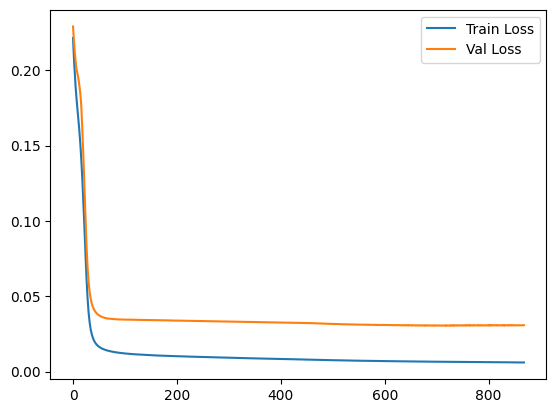

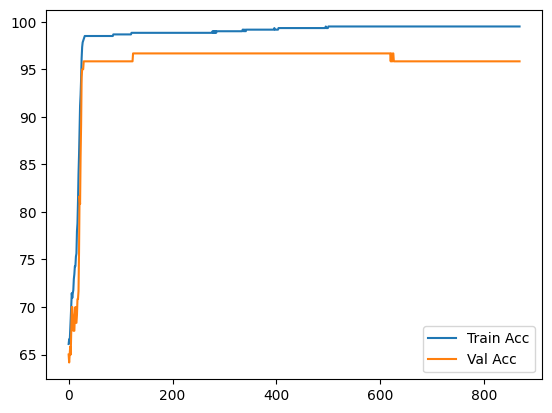

Epochs:   2%|▏         | 217/10000 [00:12<09:25, 17.30it/s]


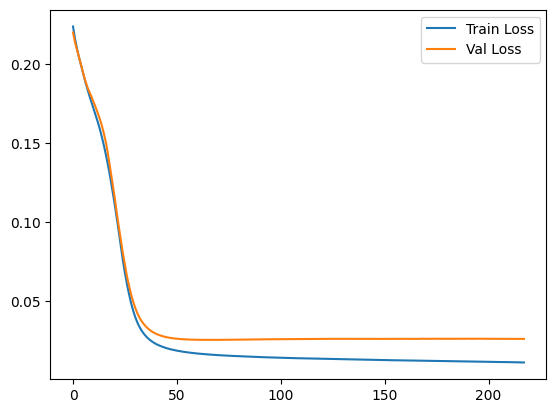

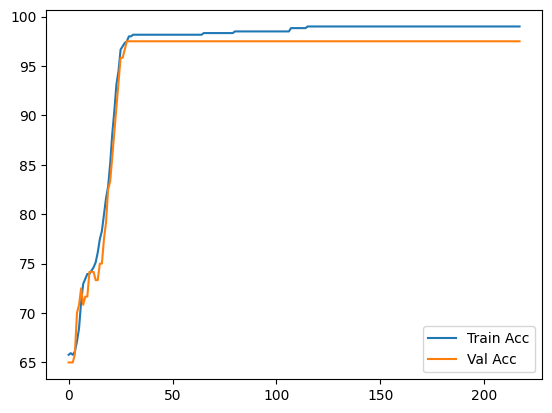

Epochs:   3%|▎         | 286/10000 [00:17<09:49, 16.48it/s]


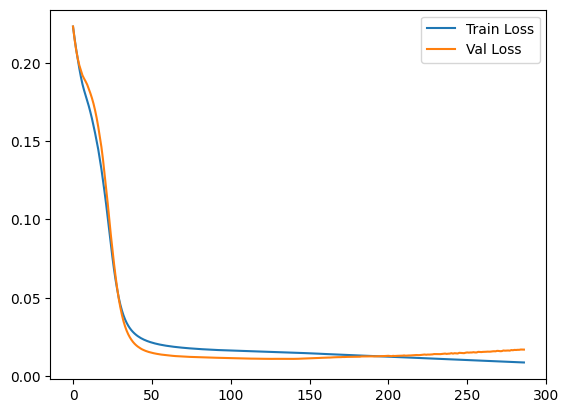

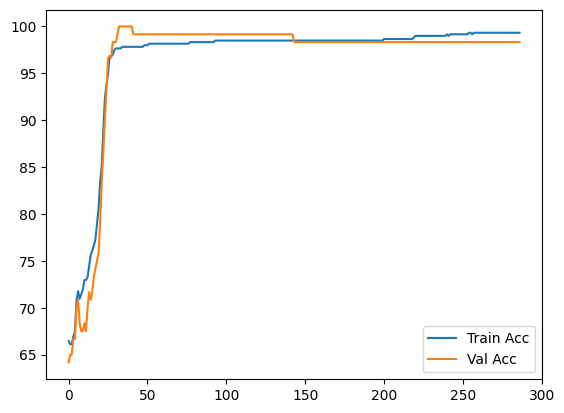

Epochs:   2%|▏         | 202/10000 [00:12<09:42, 16.83it/s]


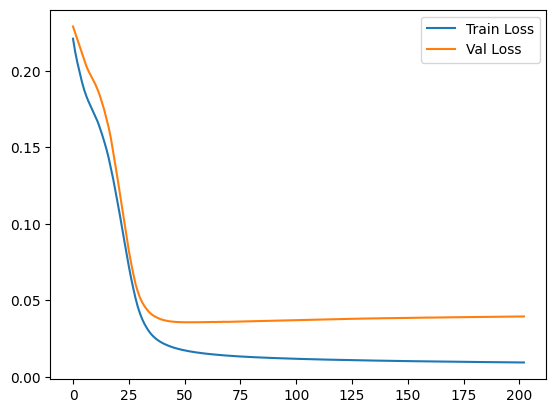

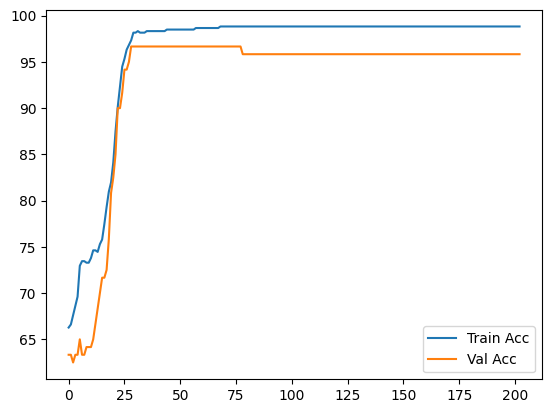

Epochs:   2%|▏         | 243/10000 [00:13<09:20, 17.42it/s]


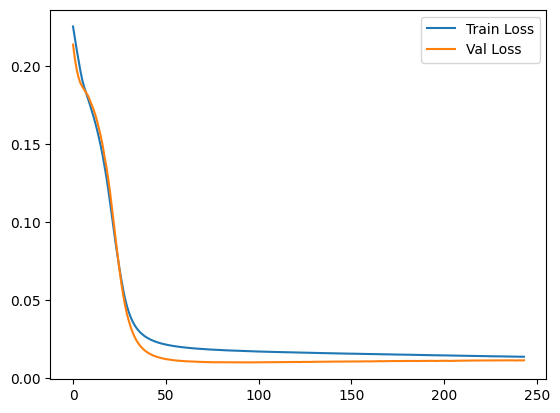

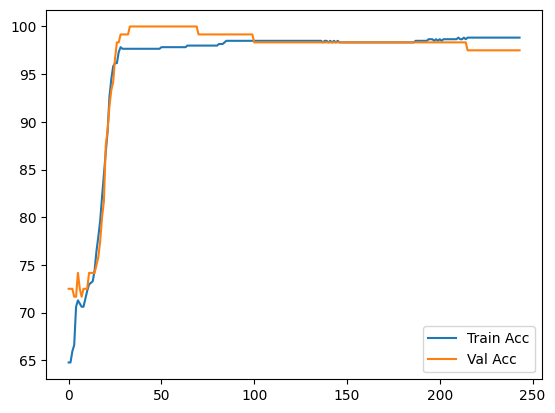

Epochs:   3%|▎         | 327/10000 [00:19<09:24, 17.15it/s]


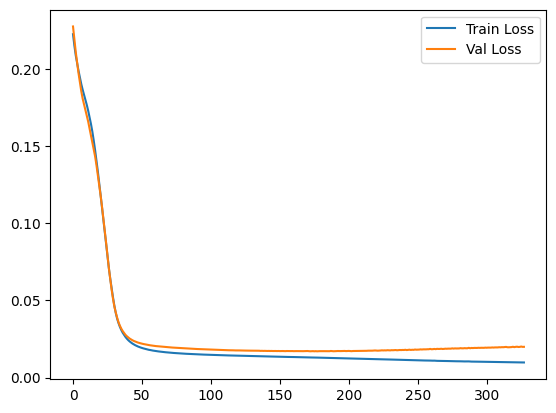

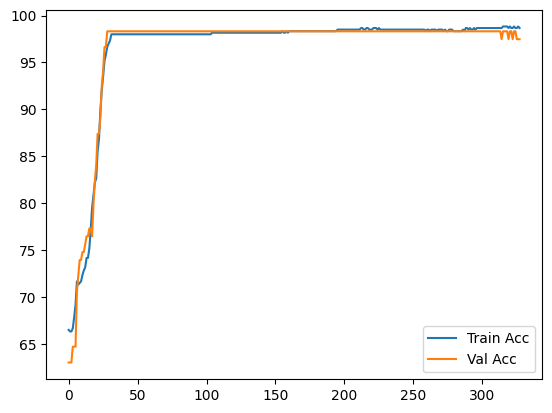

{'tr_loss': 0.014152308998389528, 'tr_accuracy': 98.6092561676869, 'val_loss': 0.021641983433770426, 'val_accuracy': 97.77544351073765}


In [6]:
statistics = kfold_crossval(
    X=X_train,
    y=y_train,
    k=6,
    net=net,
    epochs=10000,
    patience=150,
    seed=seed,
    metric=Accuracy()
)

print(statistics)